## Récupération de données cleanné

In [142]:
from pickle import Unpickler as Upck
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)

with open('/home/sylvain/Téléchargements/df_data', 'rb') as file:
    myPickler = Upck(file)
    df = myPickler.load()

## Visualisation de la repartition des produits en fonction de leur nutriscore

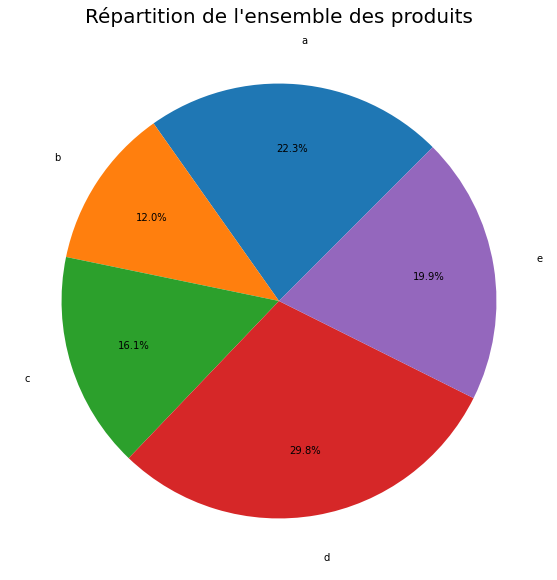

In [143]:
#df_plot = pd.DataFrame(df.groupby(['nutriscore_grade']).count()['nutriscore_score'])
#df_plot.plot.pie(y = 'nutriscore_score', figsize = (7, 7), autopct='%1.1f%%', title = 'Répartion globale du nutriscore')

x = df.groupby(['nutriscore_grade']).count()['nutriscore_score'].tolist()
labels = df.groupby(['nutriscore_grade']).count()['nutriscore_score'].index.tolist()

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Répartition de l'ensemble des produits", size = 20)
ax.pie(x, labels = labels, pctdistance = 0.7, labeldistance = 1.2, autopct='%1.1f%%', startangle = 45, counterclock= 'counterclockwise')
plt.show()

## Visualisation de la repartition des produits en fonction de leur catégorie

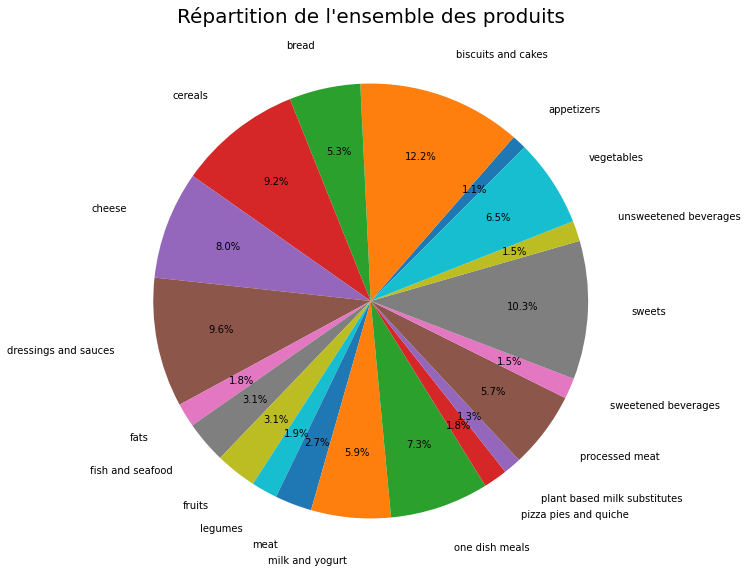

In [144]:
x = df.groupby(['pnns_groups_2']).count()['nutriscore_score'].tolist()
labels = df.groupby(['pnns_groups_2']).count()['nutriscore_score'].index.tolist()

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Répartition de l'ensemble des produits", size = 20)
ax.pie(x, labels = labels, pctdistance = 0.7, labeldistance = 1.2, autopct='%1.1f%%', startangle = 45, counterclock= 'counterclockwise')
plt.show()

## Répartition des produits en fonction de leur nutriscore et leur pays d'origine
### On constate que les proportion differes mais semble relativement équivalentes

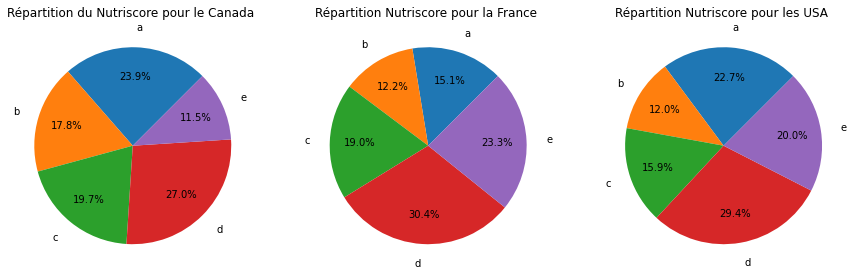

In [145]:
#dft = df.groupby(['countries_en', 'nutriscore_grade']).count()['nutriscore_score']['canada']
#dft['nutriscore_score']['canada']
xC = df.groupby(['countries_en', 'nutriscore_grade']).count()['nutriscore_score']['canada'].tolist()
labelsC = df.groupby(['countries_en', 'nutriscore_grade']).count()['nutriscore_score']['canada'].index.tolist()

xF = df.groupby(['countries_en', 'nutriscore_grade']).count()['nutriscore_score']['france'].tolist()
labelsF = df.groupby(['countries_en', 'nutriscore_grade']).count()['nutriscore_score']['france'].index.tolist()

xU = df.groupby(['countries_en', 'nutriscore_grade']).count()['nutriscore_score']['united states'].tolist()
labelsU = df.groupby(['countries_en', 'nutriscore_grade']).count()['nutriscore_score']['united states'].index.tolist()

fig, ax = plt.subplots(figsize=(15, 15), nrows = 1, ncols = 3)
ax[0].set_title("Répartition du Nutriscore pour le Canada ")
ax[0].pie(xC, labels = labelsC, pctdistance = 0.7, labeldistance = 1.2, autopct='%1.1f%%', startangle = 45, counterclock= 'counterclockwise')
ax[1].set_title("Répartition Nutriscore pour la France ")
ax[1].pie(xF, labels = labelsF, pctdistance = 0.7, labeldistance = 1.2, autopct='%1.1f%%', startangle = 45, counterclock= 'counterclockwise')
ax[2].set_title("Répartition Nutriscore pour les USA ")
ax[2].pie(xU, labels = labelsU, pctdistance = 0.7, labeldistance = 1.2, autopct='%1.1f%%', startangle = 45, counterclock= 'counterclockwise')

plt.show()

## On verifie qu'il y a bien un lien entre le nutriscore grade et le nutriscore score

<AxesSubplot:title={'center':'nutriscore_score'}, xlabel='nutriscore_grade'>

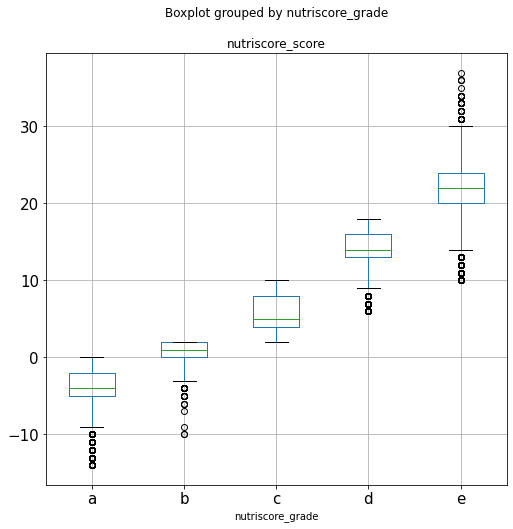

In [146]:
df.boxplot(column = 'nutriscore_score', by = 'nutriscore_grade',fontsize = 15, figsize = (8, 8))

# Correlation Matrix et visualisation 
## la formule du nutriscore depend également du type de produit.
### par exemple en filtrant sur pays et type de produit on constate qu'il y une correlation entre le 'nutriscore_score', 'salt', 'sodium' and 'sugar'

In [147]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'cereals')]
dft.select_dtypes(include=['float64']).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g
nutriscore_score,1.00,0.26,0.26,0.54,0.58,0.12,0.13,0.74,-0.28,-0.58,0.80,0.80,0.05,-0.21
energy-kcal_100g,0.26,1.00,1.00,0.31,0.12,-0.29,0.61,0.38,0.23,0.08,0.02,0.02,-0.16,0.26
energy_100g,0.26,1.00,1.00,0.30,0.12,-0.29,0.61,0.38,0.23,0.08,0.02,0.02,-0.16,0.26
fat_100g,0.54,0.31,0.30,1.00,0.84,0.23,-0.07,0.32,0.02,-0.11,0.30,0.30,0.19,0.03
saturated-fat_100g,0.58,0.12,0.12,0.84,1.00,0.38,-0.23,0.19,-0.21,-0.17,0.31,0.31,0.16,-0.11
cholesterol_100g,0.12,-0.29,-0.29,0.23,0.38,1.00,-0.35,-0.10,-0.22,0.06,0.12,0.12,0.33,-0.21
carbohydrates_100g,0.13,0.61,0.61,-0.07,-0.23,-0.35,1.00,0.48,0.47,0.22,0.08,0.08,-0.13,0.53
sugars_100g,0.74,0.38,0.38,0.32,0.19,-0.10,0.48,1.00,0.05,-0.48,0.54,0.54,-0.03,-0.04
fiber_100g,-0.28,0.23,0.23,0.02,-0.21,-0.22,0.47,0.05,1.00,0.38,-0.16,-0.16,0.09,0.49
proteins_100g,-0.58,0.08,0.08,-0.11,-0.17,0.06,0.22,-0.48,0.38,1.00,-0.43,-0.43,0.17,0.50


In [148]:
dft = df[(df['countries_en'] == 'united kingdom') & (df['pnns_groups_2'] == 'bread')]
dft.select_dtypes(include=['float64']).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g
nutriscore_score,1.00,0.42,0.42,0.49,0.70,0.75,0.06,0.05,-0.58,0.30,0.28,0.28,0.20,-0.27
energy-kcal_100g,0.42,1.00,1.00,0.51,0.39,0.35,0.81,-0.43,-0.32,0.58,0.53,0.53,0.15,0.47
energy_100g,0.42,1.00,1.00,0.51,0.39,0.35,0.81,-0.43,-0.32,0.58,0.53,0.53,0.15,0.48
fat_100g,0.49,0.51,0.51,1.00,0.51,0.37,0.23,-0.32,-0.34,0.27,0.09,0.09,0.25,0.06
saturated-fat_100g,0.70,0.39,0.39,0.51,1.00,0.62,0.09,-0.16,-0.36,0.18,0.04,0.04,0.60,-0.12
cholesterol_100g,0.75,0.35,0.35,0.37,0.62,1.00,0.06,-0.19,-0.63,0.67,0.05,0.05,0.56,-0.14
carbohydrates_100g,0.06,0.81,0.81,0.23,0.09,0.06,1.00,-0.31,-0.02,0.60,0.65,0.65,0.28,0.80
sugars_100g,0.05,-0.43,-0.43,-0.32,-0.16,-0.19,-0.31,1.00,0.21,-0.22,-0.15,-0.15,-0.16,-0.21
fiber_100g,-0.58,-0.32,-0.32,-0.34,-0.36,-0.63,-0.02,0.21,1.00,-0.28,-0.07,-0.07,-0.13,0.51
proteins_100g,0.30,0.58,0.58,0.27,0.18,0.67,0.60,-0.22,-0.28,1.00,0.35,0.35,0.56,0.53


In [149]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'processed meat')]
dft.select_dtypes(include=['float64']).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g
nutriscore_score,1.00,0.88,0.88,0.91,0.92,0.22,-0.00,-0.05,-0.09,-0.39,-0.21,-0.21,0.12,0.08
energy-kcal_100g,0.88,1.00,1.00,0.96,0.94,0.19,-0.01,-0.09,-0.02,-0.40,-0.24,-0.24,0.10,0.11
energy_100g,0.88,1.00,1.00,0.96,0.94,0.19,-0.01,-0.09,-0.02,-0.40,-0.24,-0.24,0.10,0.11
fat_100g,0.91,0.96,0.96,1.00,0.98,0.24,-0.07,-0.15,-0.03,-0.38,-0.20,-0.20,0.13,0.09
saturated-fat_100g,0.92,0.94,0.94,0.98,1.00,0.25,-0.08,-0.15,-0.04,-0.38,-0.22,-0.22,0.11,0.09
cholesterol_100g,0.22,0.19,0.19,0.24,0.25,1.00,-0.13,-0.06,-0.15,0.45,0.20,0.20,0.02,-0.01
carbohydrates_100g,-0.00,-0.01,-0.01,-0.07,-0.08,-0.13,1.00,0.70,0.30,-0.00,0.02,0.02,0.15,0.04
sugars_100g,-0.05,-0.09,-0.09,-0.15,-0.15,-0.06,0.70,1.00,0.10,0.07,0.01,0.01,0.03,-0.02
fiber_100g,-0.09,-0.02,-0.02,-0.03,-0.04,-0.15,0.30,0.10,1.00,0.01,0.05,0.05,0.16,0.15
proteins_100g,-0.39,-0.40,-0.40,-0.38,-0.38,0.45,-0.00,0.07,0.01,1.00,0.29,0.29,0.02,0.06


In [150]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'fruits')]
dft.select_dtypes(include=['float64']).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g
nutriscore_score,1.00,0.56,0.56,0.04,0.17,0.02,0.78,0.84,-0.58,-0.13,0.19,0.19,-0.07,-0.13
energy-kcal_100g,0.56,1.00,1.00,0.19,0.19,0.04,0.66,0.50,-0.06,0.15,0.14,0.14,0.13,0.10
energy_100g,0.56,1.00,1.00,0.19,0.19,0.04,0.66,0.50,-0.06,0.15,0.14,0.14,0.13,0.10
fat_100g,0.04,0.19,0.19,1.00,0.76,0.19,0.05,-0.05,0.21,0.45,0.16,0.16,0.14,0.32
saturated-fat_100g,0.17,0.19,0.19,0.76,1.00,0.19,0.09,0.02,0.08,0.29,0.12,0.12,0.11,0.25
cholesterol_100g,0.02,0.04,0.04,0.19,0.19,1.00,0.02,0.02,-0.01,0.22,0.08,0.08,0.16,0.04
carbohydrates_100g,0.78,0.66,0.66,0.05,0.09,0.02,1.00,0.86,-0.06,0.09,0.09,0.09,0.14,0.11
sugars_100g,0.84,0.50,0.50,-0.05,0.02,0.02,0.86,1.00,-0.28,-0.05,0.06,0.06,0.01,-0.07
fiber_100g,-0.58,-0.06,-0.06,0.21,0.08,-0.01,-0.06,-0.28,1.00,0.29,-0.06,-0.06,0.33,0.42
proteins_100g,-0.13,0.15,0.15,0.45,0.29,0.22,0.09,-0.05,0.29,1.00,0.08,0.08,0.37,0.42


In [151]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'meat')]
dft.select_dtypes(include=['float64']).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g
nutriscore_score,1.00,0.83,0.83,0.67,0.68,0.19,0.18,0.35,-0.19,-0.13,0.46,0.46,0.01,-0.01
energy-kcal_100g,0.83,1.00,1.00,0.79,0.74,0.10,0.27,0.28,0.01,-0.11,0.19,0.19,0.01,0.15
energy_100g,0.83,1.00,1.00,0.79,0.74,0.10,0.27,0.28,0.01,-0.11,0.19,0.19,0.01,0.15
fat_100g,0.67,0.79,0.79,1.00,0.96,0.37,-0.20,-0.25,-0.08,0.29,0.19,0.19,0.10,0.30
saturated-fat_100g,0.68,0.74,0.74,0.96,1.00,0.45,-0.27,-0.25,-0.16,0.32,0.14,0.14,0.06,0.29
cholesterol_100g,0.19,0.10,0.10,0.37,0.45,1.00,-0.54,-0.38,-0.53,0.68,0.07,0.07,-0.27,-0.04
carbohydrates_100g,0.18,0.27,0.27,-0.20,-0.27,-0.54,1.00,0.69,0.47,-0.48,0.15,0.15,0.13,-0.02
sugars_100g,0.35,0.28,0.28,-0.25,-0.25,-0.38,0.69,1.00,0.06,-0.59,-0.01,-0.01,-0.06,-0.24
fiber_100g,-0.19,0.01,0.01,-0.08,-0.16,-0.53,0.47,0.06,1.00,-0.16,0.12,0.12,0.35,0.36
proteins_100g,-0.13,-0.11,-0.11,0.29,0.32,0.68,-0.48,-0.59,-0.16,1.00,0.04,0.04,0.01,0.26


In [152]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'milk and yogurt')]
dft.select_dtypes(include=['float64']).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g
nutriscore_score,1.00,0.85,0.85,0.83,0.83,0.64,0.36,0.30,-0.24,-0.43,0.34,0.34,-0.22,0.00
energy-kcal_100g,0.85,1.00,1.00,0.82,0.75,0.51,0.43,0.32,-0.05,-0.14,0.19,0.19,-0.36,0.08
energy_100g,0.85,1.00,1.00,0.82,0.75,0.51,0.43,0.32,-0.05,-0.14,0.19,0.19,-0.36,0.08
fat_100g,0.83,0.82,0.82,1.00,0.95,0.71,-0.04,-0.09,-0.15,-0.36,0.17,0.17,-0.23,-0.05
saturated-fat_100g,0.83,0.75,0.75,0.95,1.00,0.84,-0.04,-0.08,-0.18,-0.31,0.21,0.21,-0.15,-0.07
cholesterol_100g,0.64,0.51,0.51,0.71,0.84,1.00,-0.04,-0.05,-0.19,-0.16,0.26,0.26,0.00,-0.11
carbohydrates_100g,0.36,0.43,0.43,-0.04,-0.04,-0.04,1.00,0.91,0.13,0.16,0.18,0.18,-0.17,0.26
sugars_100g,0.30,0.32,0.32,-0.09,-0.08,-0.05,0.91,1.00,0.05,0.13,0.11,0.11,-0.09,0.19
fiber_100g,-0.24,-0.05,-0.05,-0.15,-0.18,-0.19,0.13,0.05,1.00,0.23,-0.06,-0.06,-0.13,0.44
proteins_100g,-0.43,-0.14,-0.14,-0.36,-0.31,-0.16,0.16,0.13,0.23,1.00,-0.03,-0.03,-0.07,0.11


# les facteurs : energy-kcal_100g, fat_100g, sugars_100g, salt_100g

### Test Unvarié (normal test / CHI2 test) sur les facteurs: energy-kcal_100g, fat_100g, sugars_100g, salt_100g, pour un pays donnée  et type de produit donné

### energie_100g:
#### Comme précedement la formule du nutriscore depend de la categories du produit

In [153]:
from scipy.stats import normaltest, norm, gamma, chisquare, f_oneway, kruskal
from scipy.special import digamma

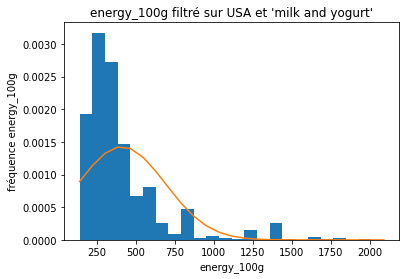

In [186]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'milk and yogurt')]
x, b, _ = plt.hist(dft['energy_100g'], bins = np.linspace(dft['energy_100g'].min(), dft['energy_100g'].max(),25), density = True)
plt.ylabel('fréquence energy_100g')
plt.xlabel('energy_100g')
plt.title("energy_100g filtré sur USA et 'milk and yogurt'")
plt.plot(b,  norm.pdf(b, loc = dft['energy_100g'].mean(), scale = dft['energy_100g'].std()))
plt.show()


#### P value = 0, H0 rejetée, la distribution ne suit pas une loi normale 

In [155]:
X, p = normaltest(dft['energy_100g'])
print(X, p)

3099.8150615678733 0.0


### approcher la distribution avec une loi gamma

a:  3.3433800332546233 lambda:  0.00818149935511367


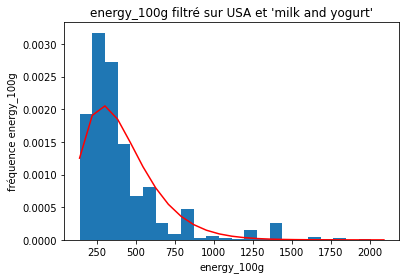

Power_divergenceResult(statistic=0.010777140023790929, pvalue=1.0)

In [187]:
# Fonction derivée de la log vraisemblance d'une loi Gamma, pour la paramètre 'a'. 
def fun(a, X):
    return np.log(a) - np.log(np.mean(X)) + np.mean(np.log(X)) - digamma(a)

#calcul du min de la dérivée de la log vraisemblance par dichotomie 
def dicotomie(X):
    n = len(X)
    aS = 1000
    aI = 0.001
    a = (aS - aI)/2#np.random.randint(100)
    while abs(fun(a, X)) > 0.00001:
        if fun(a, X) > 0:
            aI = a
            a = (aS + aI)/2
        else:
            aS = a
            a = (aS + aI)/2
    return a

dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'milk and yogurt')]
a = dicotomie(dft['energy_100g'])
bg = a/dft['energy_100g'].mean()
print('a: ',a,'lambda: ', bg)

x, b, _ = plt.hist(dft['energy_100g'],bins = np.linspace(dft['energy_100g'].min(), dft['energy_100g'].max(),25), density = True)
plt.ylabel('fréquence energy_100g')
plt.xlabel('energy_100g')
plt.plot(b, gamma.pdf(b, a = a, scale = 1/bg), color = 'r')
c
plt.show()
chisquare(x, gamma.pdf(b, a = a, scale = 1/bg)[:-1])

#### P value = 1, H0 accepté, la distribution ne suit pas une loi Gama(3.34, 0.008) 

### fat_100g:
#### Comme précedement la formule du nutriscore depend de la categories du produit

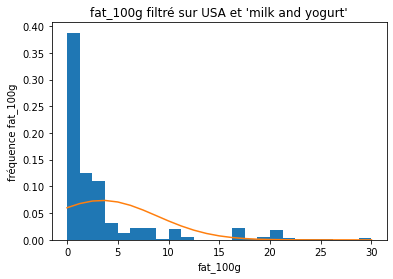

[3.87607119e-01 1.26038233e-01 1.09822017e-01 3.13777192e-02
 1.25247198e-02 2.17534608e-02 2.22808174e-02 1.31839156e-03
 2.01713909e-02 5.53724456e-03 5.27356625e-04 1.31839156e-04
 5.27356625e-04 2.18852999e-02 1.84574819e-03 4.74620962e-03
 1.85893210e-02 3.55965722e-03 2.50494397e-03 1.18655241e-03
 1.97758734e-03 6.59195781e-04 0.00000000e+00 3.42781806e-03]


In [188]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'milk and yogurt')]
#dft['fat_100g'] = dft['fat_100g']+1/dft['fat_100g'].max()
#dft['fat_100g'] = np.log(dft['fat_100g'])
x, b, _ = plt.hist(dft['fat_100g'], bins = np.linspace(dft['fat_100g'].min(), dft['fat_100g'].max(),25), density = True)
plt.ylabel('fréquence fat_100g')
plt.xlabel('fat_100g')
plt.title("fat_100g filtré sur USA et 'milk and yogurt'")
plt.plot(b,  norm.pdf(b, loc = dft['fat_100g'].mean(), scale = dft['fat_100g'].std()))
plt.show()
print(x)


#### P value = 0, H0 rejetée, la distribution ne suit pas une loi normale 

In [158]:
X, p = normaltest(dft['fat_100g'])
print(X, p)

3006.1226333728887 0.0


### sugars_100g:
#### Comme précedement la formule du nutriscore depend de la categories du produit

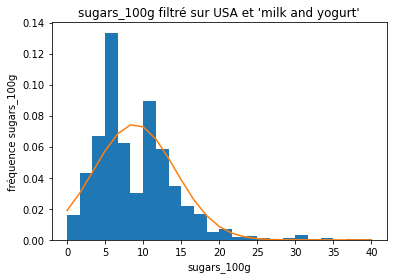

[1.62162162e-02 4.31114041e-02 6.69413316e-02 1.33388266e-01
 6.24917601e-02 3.00593276e-02 8.94858273e-02 5.88332235e-02
 3.46077785e-02 2.15557020e-02 1.69083718e-02 5.14172709e-03
 7.31707317e-03 2.17534608e-03 2.27422544e-03 1.48319051e-03
 6.92155570e-04 1.48319051e-03 2.86750165e-03 7.91034937e-04
 1.48319051e-03 9.88793672e-05 2.96638102e-04 2.96638102e-04]


In [189]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'milk and yogurt')]
#dft['fat_100g'] = dft['fat_100g']+1/dft['fat_100g'].max()
#dft['fat_100g'] = np.log(dft['fat_100g'])
x, b, _ = plt.hist(dft['sugars_100g'], bins = np.linspace(dft['sugars_100g'].min(), dft['sugars_100g'].max(),25), density = True)
plt.ylabel('fréquence sugars_100g')
plt.xlabel('sugars_100g')
plt.title("sugars_100g filtré sur USA et 'milk and yogurt'")
plt.plot(b,  norm.pdf(b, loc = dft['sugars_100g'].mean(), scale = dft['sugars_100g'].std()))
plt.show()
print(x)


#### P value = 0, H0 rejetée, la distribution ne suit pas une loi normale 

In [160]:
X, p = normaltest(dft['fat_100g'])
print(X, p)

3006.1226333728887 0.0


### Salt_100g:
#### Comme précedement la formule du nutriscore depend de la categories du produit

<ipython-input-190-748406a6e00c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['salt_100g'] = dft['salt_100g']+1/dft['salt_100g'].max()
<ipython-input-190-748406a6e00c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['salt_100g'] = np.log(dft['salt_100g'])


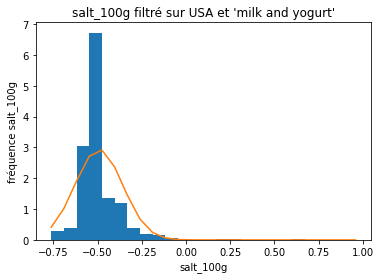

[2.94161730e-01 3.99876102e-01 3.03354284e+00 6.72205516e+00
 1.35819986e+00 1.20192644e+00 3.79192855e-01 1.83851081e-01
 1.72360389e-01 4.59627703e-02 3.21739392e-02 4.59627703e-03
 1.14906926e-02 1.60869696e-02 1.83851081e-02 1.14906926e-02
 9.19255407e-03 9.19255407e-03 2.29813852e-03 2.06832466e-02
 6.89441555e-03 0.00000000e+00 9.19255407e-03 2.29813852e-03]


In [190]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'milk and yogurt')]
dft['salt_100g'] = dft['salt_100g']+1/dft['salt_100g'].max()
dft['salt_100g'] = np.log(dft['salt_100g'])
x, b, _ = plt.hist(dft['salt_100g'], bins = np.linspace(dft['salt_100g'].min(), dft['salt_100g'].max(),25), density = True)
plt.ylabel('fréquence salt_100g')
plt.xlabel('salt_100g')
plt.title("salt_100g filtré sur USA et 'milk and yogurt'")
plt.plot(b,  norm.pdf(b, loc = dft['salt_100g'].mean(), scale = dft['salt_100g'].std()))
plt.show()
print(x)


#### P value = 0, H0 rejetée, la distribution ne suit pas une loi normale 

In [162]:
X, p = normaltest(dft['fat_100g'])
print(X, p)

3006.1226333728887 0.0


# Test Bivarié Pearson sur les facteurs: energy-kcal_100g, fat_100g, sugars_100g, salt_100g

In [163]:
from scipy.stats import pearsonr

### Test on salt_100g

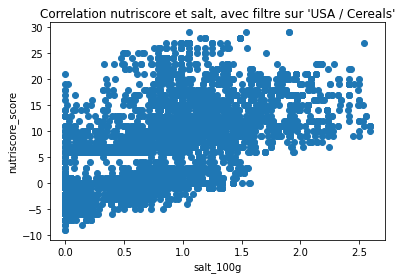

(0.8047309357143914, 0.0)

In [164]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'cereals')]
plt.scatter(dft['salt_100g'], dft['nutriscore_score'])
plt.ylabel('nutriscore_score')
plt.xlabel('salt_100g')
plt.title("Correlation nutriscore et salt, avec filtre sur 'USA / Cereals'")
plt.show()
pearsonr(dft['salt_100g'], dft['nutriscore_score'])

#### la p-value est proche de 0, on a donc une correlation 0.8 significative entre 'salt_100g' et 'nutriscore_score'

### Test on sugars_100g

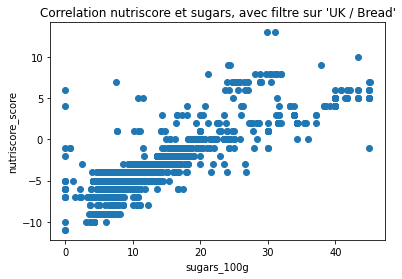

(0.8383531490283928, 0.0)

In [165]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'fruits')]
plt.scatter(dft['sugars_100g'], dft['nutriscore_score'], label = 'United Kingdom / Bread')
plt.ylabel('nutriscore_score')
plt.xlabel('sugars_100g')
plt.title("Correlation nutriscore et sugars, avec filtre sur 'UK / Bread'")
plt.show()
pearsonr(dft['sugars_100g'], dft['nutriscore_score'])

#### la p-value = 0 on a donc une correlation 0.83 significative entre 'sugars_100g' et 'nutriscore_score'

### Test on energy_100g et fat_100g

TypeError: 'Text' object is not callable

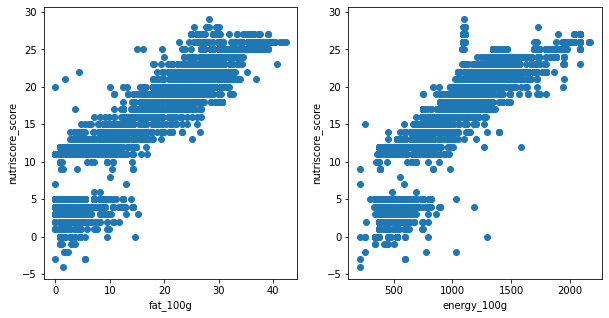

In [191]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'processed meat')]

fig, ax = plt.subplots(figsize = (10, 5), nrows = 1, ncols = 2)
ax[0].scatter(dft['fat_100g'], dft['nutriscore_score'], label='USA / Processed meat')
ax[0].set_ylabel('nutriscore_score')
ax[0].set_xlabel('fat_100g')
ax[1].scatter(dft['energy_100g'], dft['nutriscore_score'], label='USA / Processed meat')
ax[1].set_ylabel('nutriscore_score')
ax[1].set_xlabel('energy_100g')
ax[0].title("Correlation nutriscore et energy, filtre sur 'USA / processed meat'")
ax[1].title("Correlation nutriscore et fat, filtre sur 'USA / processed meat'")
plt.show()

print(pearsonr(dft['energy_100g'], dft['nutriscore_score']))
pearsonr(dft['fat_100g'], dft['nutriscore_score'])


#### la p-value est proche de 0, on a donc une correlation 0.91 significative entre 'salt_100g' et 'nutriscore_score'
#### la p-value est proche de 0, on a donc une correlation 0.87 significative entre 'energy_100g' et 'nutriscore_score'

# ANOVA 
### on regarde l'évolution de la distribution des l'ensemble des facteurs pour un pays et un produits donné

KruskalResult(statistic=8439.263647672933, pvalue=0.0)


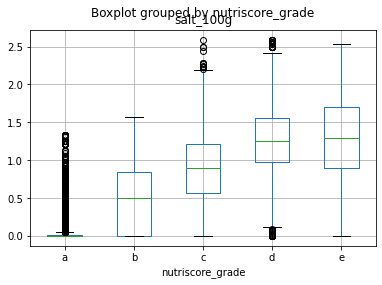

In [167]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'cereals')]
dft.boxplot(column = 'salt_100g', by = 'nutriscore_grade')

l = ['a','b','c','d','e']
w = []
for val in l:
    w.append(df[(df['pnns_groups_2'] == 'cereals') & (df['countries_en'] == 'united states') & (df['nutriscore_grade'] == val)]['nutriscore_score'].tolist())
# print(f_oneway(*w))# pas autorize car variable non normal.
print(kruskal(*w))

KruskalResult(statistic=830.458276591116, pvalue=1.9391392309213916e-178)


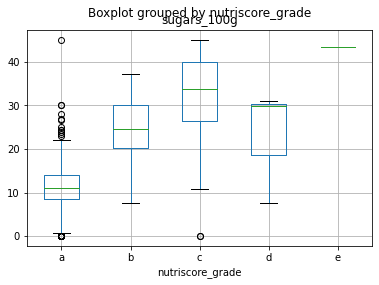

In [168]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'fruits')]
dft.boxplot(column = 'sugars_100g', by = 'nutriscore_grade')

l = ['a','b','c','d','e']
w = []
for val in l:
    w.append(df[(df['pnns_groups_2'] == 'fruits') & (df['countries_en'] == 'united states') & (df['nutriscore_grade'] == val)]['nutriscore_score'].tolist())
# print(f_oneway(*w))# pas autorize car variable non normal.
print(kruskal(*w))

KruskalResult(statistic=4289.756669168762, pvalue=0.0)


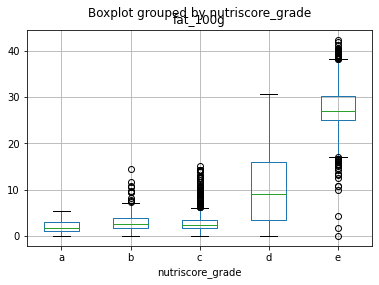

In [169]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'processed meat')]
dft.boxplot(column = 'fat_100g', by = 'nutriscore_grade')

l = ['a','b','c','d','e']
w = []
for val in l:
    w.append(df[(df['pnns_groups_2'] == 'processed meat') & (df['countries_en'] == 'united states') & (df['nutriscore_grade'] == val)]['nutriscore_score'].tolist())
# print(f_oneway(*w))# pas autorize car variable non normal.
print(kruskal(*w))

KruskalResult(statistic=4289.756669168762, pvalue=0.0)


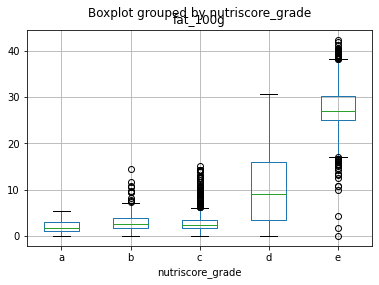

In [170]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'processed meat')]
dft.boxplot(column = 'fat_100g', by = 'nutriscore_grade')

l = ['a','b','c','d','e']
w = []
for val in l:
    w.append(df[(df['pnns_groups_2'] == 'processed meat') & (df['countries_en'] == 'united states') & (df['nutriscore_grade'] == val)]['nutriscore_score'].tolist())
# print(f_oneway(*w))# pas autorize car variable non normal.
print(kruskal(*w))

KruskalResult(statistic=4289.756669168762, pvalue=0.0)


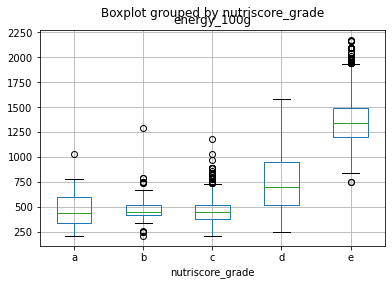

In [171]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'processed meat')]
dft.boxplot(column = 'energy_100g', by = 'nutriscore_grade')

l = ['a','b','c','d','e']
w = []
for val in l:
    w.append(df[(df['pnns_groups_2'] == 'processed meat') & (df['countries_en'] == 'united states') & (df['nutriscore_grade'] == val)]['nutriscore_score'].tolist())
# print(f_oneway(*w))# pas autorize car variable non normal.
print(kruskal(*w))

## Variation du nutriscore d'une meme categorie de produit en fonction de son pays
### Ex: repartition du nutriscore pour une categorie de produit et par pays

KruskalResult(statistic=91.95041785540715, pvalue=5.070948252210581e-19)


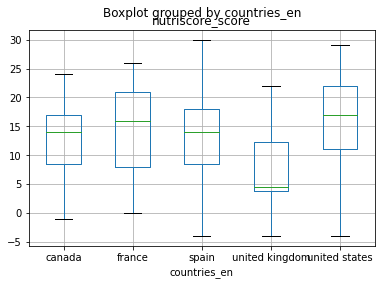

In [172]:
dft = df[df['pnns_groups_2']== 'processed meat'].boxplot(column = 'nutriscore_score', by = 'countries_en')
dft
l = ['canada','france','spain','united kingdom','united states']
w = []
for val in l:
    w.append(df[(df['pnns_groups_2'] == 'processed meat') & (df['countries_en'] == val)]['nutriscore_score'].tolist())
# print(f_oneway(*w))# pas autorize car variable non normal.
print(kruskal(*w))

<AxesSubplot:title={'center':'nutriscore_score'}, xlabel='countries_en'>

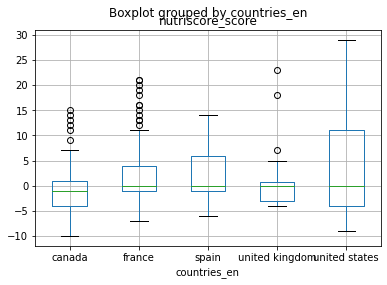

In [173]:
df[df['pnns_groups_2']== 'cereals'].boxplot(column = 'nutriscore_score', by = 'countries_en')

<AxesSubplot:title={'center':'nutriscore_score'}, xlabel='countries_en'>

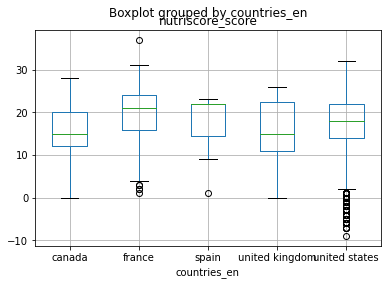

In [174]:
df[df['pnns_groups_2']== 'biscuits and cakes'].boxplot(column = 'nutriscore_score', by = 'countries_en')

<AxesSubplot:title={'center':'energy_100g'}, xlabel='nutriscore_grade'>

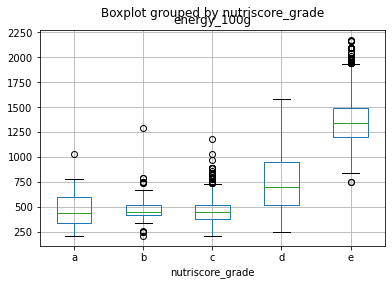

In [176]:
dft = df[(df['countries_en'] == 'united states') & (df['pnns_groups_2'] == 'processed meat')]
dft.boxplot(column = 'energy_100g', by = 'nutriscore_grade')

## Simple visualisation de l'energie par categorie d'aliments 

<AxesSubplot:title={'center':'energy_100g'}, xlabel='pnns_groups_2'>

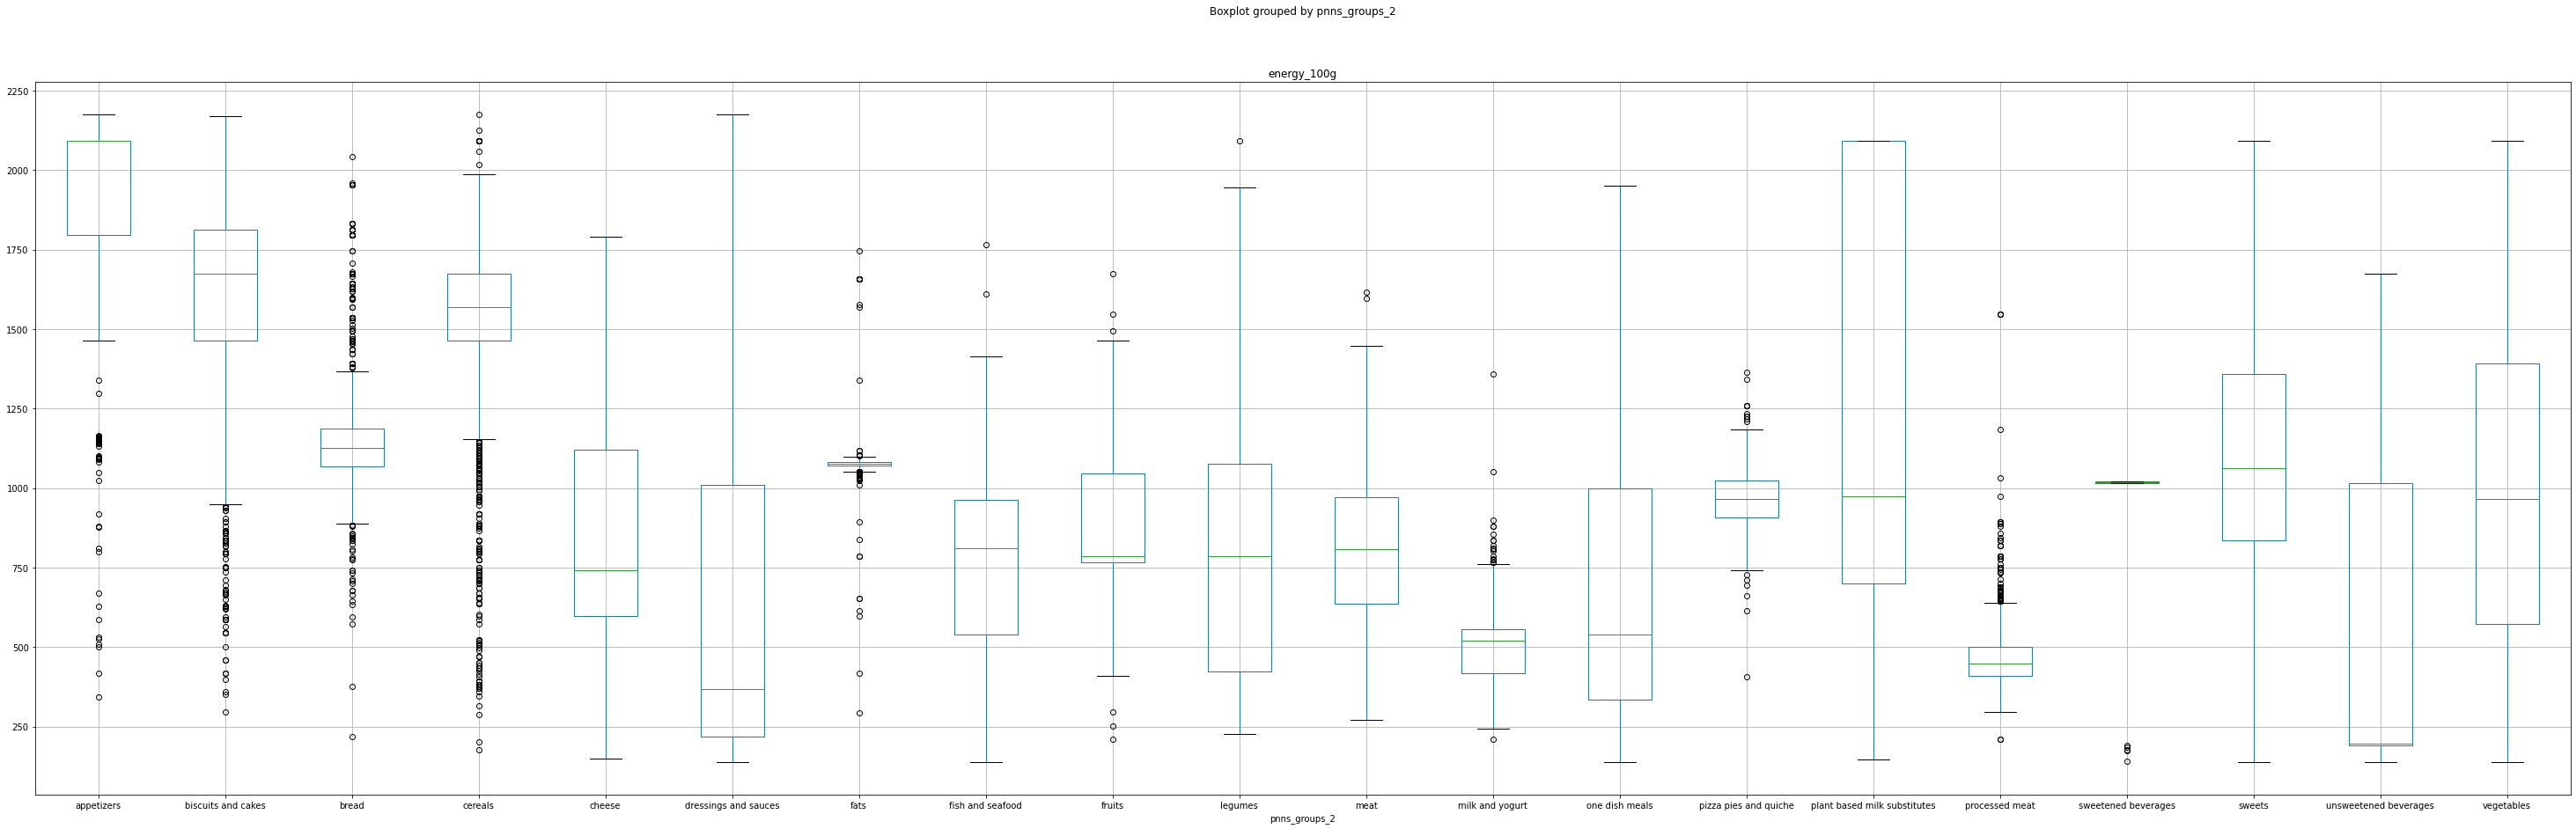

In [175]:
df[df['nutriscore_grade']== 'c'].boxplot(column = 'energy_100g', by = 'pnns_groups_2', figsize = (50, 15))

# PCA sur le dataset

In [177]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [203]:
# On encode les data type text
dft = df.copy()
dft = dft[(dft['countries_en'] == 'united states') & (dft['pnns_groups_2'] == 'legumes')]
#dft = dft.select_dtypes('float64')
for col in dft:
    if dft[col].dtypes == object:
        X = dft[col].to_numpy()
        X = X.reshape(-1,1)
        enc = OrdinalEncoder()
        enc.fit(X)
        X =  enc.transform(X)
        dft[col] = pd.Series(X.ravel(), index = dft[col].index)
        

X = dft.to_numpy()
Y = X
X = preprocessing.StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

print(pca.explained_variance_ratio_)
print(pca.n_components_)
print(pca.singular_values_)
print(pca.mean_)

[0.33049519 0.28567683]
2
[97.61237744 90.752758  ]
[ 0.00000000e+00 -5.17564948e-17  4.99080486e-17  0.00000000e+00
  6.28471723e-17 -1.10906775e-16  5.54533873e-17 -3.69689249e-18
 -7.39378497e-18 -1.47875699e-17  1.84844624e-18 -1.62663269e-16
 -2.55085582e-16  1.23845898e-16 -9.42707584e-17 -5.48988534e-16
  2.40298012e-16]


## KMeans sur le dataset

1922 1922


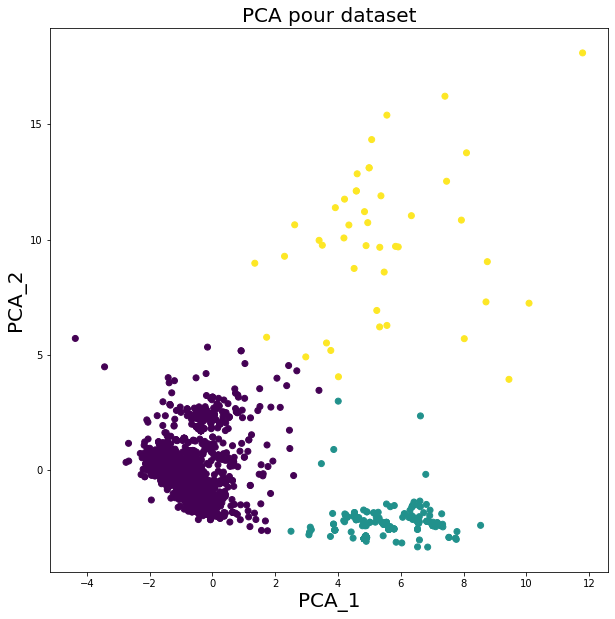

In [204]:
k = KMeans(n_clusters=3, random_state = 0 ).fit(X)
print(len(k.labels_), len(X))
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c = k.labels_)
plt.title("PCA pour dataset", fontsize = 20)
plt.xlabel('PCA_1', fontsize = 20)
plt.ylabel('PCA_2',fontsize = 20)
plt.show()


In [180]:
n = 0
for i in np.arange(len(k.labels_)):
    if k.labels_[i] == Y[i,2]:
        n+=1
print(n/len(k.labels_))

0.2943785446687239
